# Aprendizagem não supervisionada

A aprendizagem não supervisionada é uma área da aprendizagem automática que se foca na extração de padrões e estruturas interessantes de dados não etiquetados. Em Python, a biblioteca [scikit-learn](https://scikit-learn.org/) é uma das ferramentas mais utilizadas para aplicar abordagens de aprendizagem não supervisionada e de aprendizagem automática em geral. Com uma vasta coleção de algoritmos de agrupamento (*clustering*), redução de dimensionalidade e deteção de anomalias, a biblioteca *scikit-learn* oferece uma ampla gama de funcionalidades para explorar e compreender conjuntos de dados não etiquetados. Este tutorial foca-se maioritariamente na aplicação de algumas abordagens de *clustering*. Para obter informação sobre outras funcionalidades disponibilizadas pela biblioteca *scikit-learn*, recomendamos a consulta da sua [documentação](https://scikit-learn.org/stable/user_guide.html).

In [47]:
import sklearn

In [48]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme() 

## Manipulação de dados

Para além de implementações eficientes de algoritmos de aprendizagem automática, a biblioteca *scikit-learn* também disponibiliza algumas funcionalidades de manipulação de dados relevantes no contexto da aplicação desses algoritmos. Por exemplo, normalização e redução de dimensionalidade. Para demonstrar algumas destas funcionalidades, vamos usar o conjunto de dados [Iris](https://archive.ics.uci.edu/dataset/53/iris) que já vimos anteriormente:

In [49]:
iris = sns.load_dataset('iris')
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
107,7.3,2.9,6.3,1.8,virginica
132,6.4,2.8,5.6,2.2,virginica
133,6.3,2.8,5.1,1.5,virginica
148,6.2,3.4,5.4,2.3,virginica
33,5.5,4.2,1.4,0.2,setosa


**Nota**: O método `sample` escolhe aleatoriamente uma amostra de *n* exemplos do conjunto de dados.

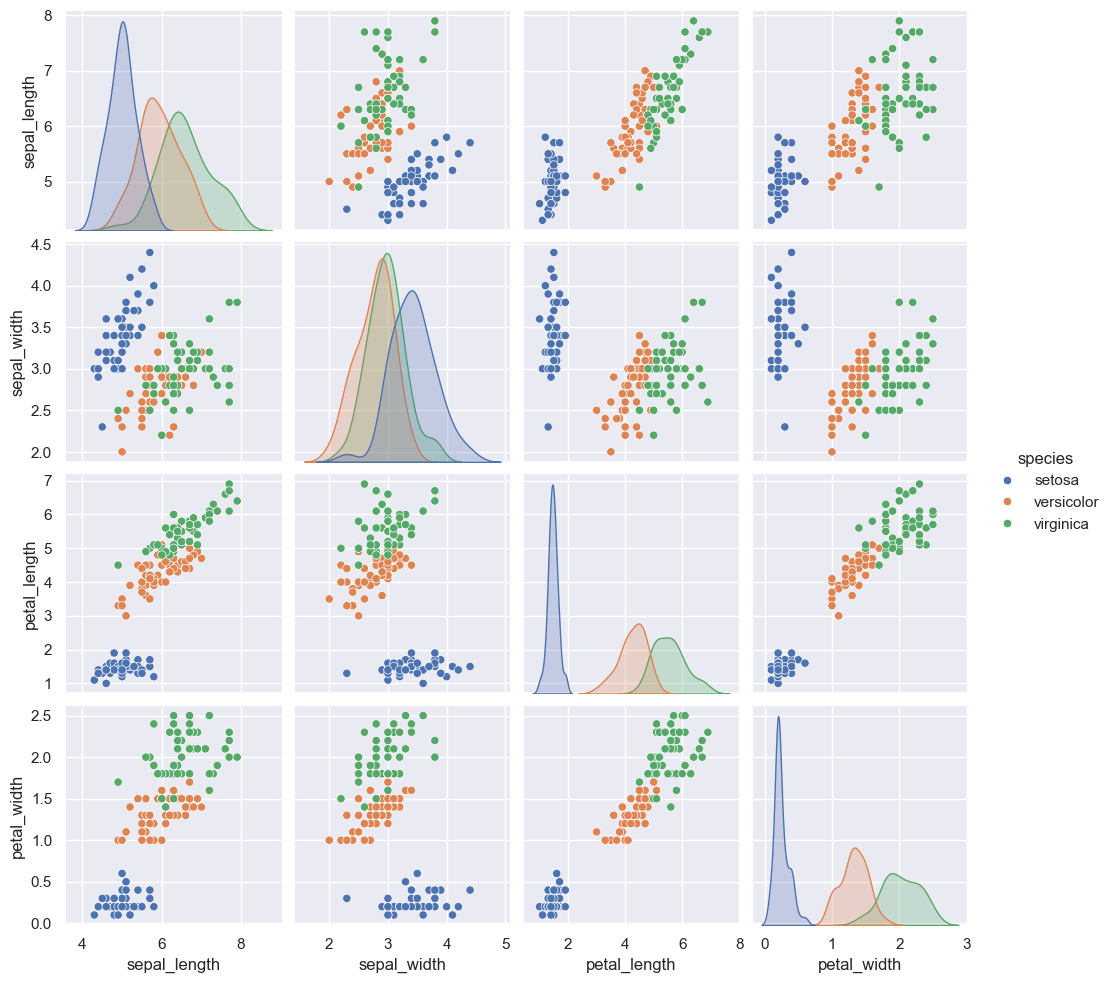

In [50]:
sns.pairplot(iris, hue='species');

Num contexto de aprendizagem não supervisionada, a espécie de planta serve apenas como uma indicação de uma possível separação dos dados que tem um significado conhecido no mundo real. Para além disso, mesmo que estivessemos num contexto de aprendizagem supervisionada, a biblioteca *scikit-learn* lida separadamente com os atributos usados para representar os dados e aquele ou aqueles que representam o que se pretende prever. Como tal, para simplificar a aplicação das funções da biblioteca, vamos criar uma nova tabela de dados sem o atributo `species`:

In [51]:
iris_features = iris.drop(columns=['species'])
iris_features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Nota**: A subdivisão dos exemplos por espécie de planta vai continuar a ser usada como apoio em algumas visualizações.

### Normalização

A normalização dos valores dos atributos pode ter um impacto relevante quando estes têm escalas diferentes. A classe `StandardScaler` da biblioteca *scikit-learn* pode ser usada para fazer normalização baseada em *z-score*, isto é, transformar os atributos de forma a que a distribuição dos seus valores tenha média zero e desvio padrão unitário.

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
std_scaler = StandardScaler()
std_scaler.fit(iris_features)
scaled_features = std_scaler.transform(iris_features)
std_scaled_iris = pd.DataFrame(scaled_features, index=iris_features.index, columns=iris_features.columns)
std_scaled_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


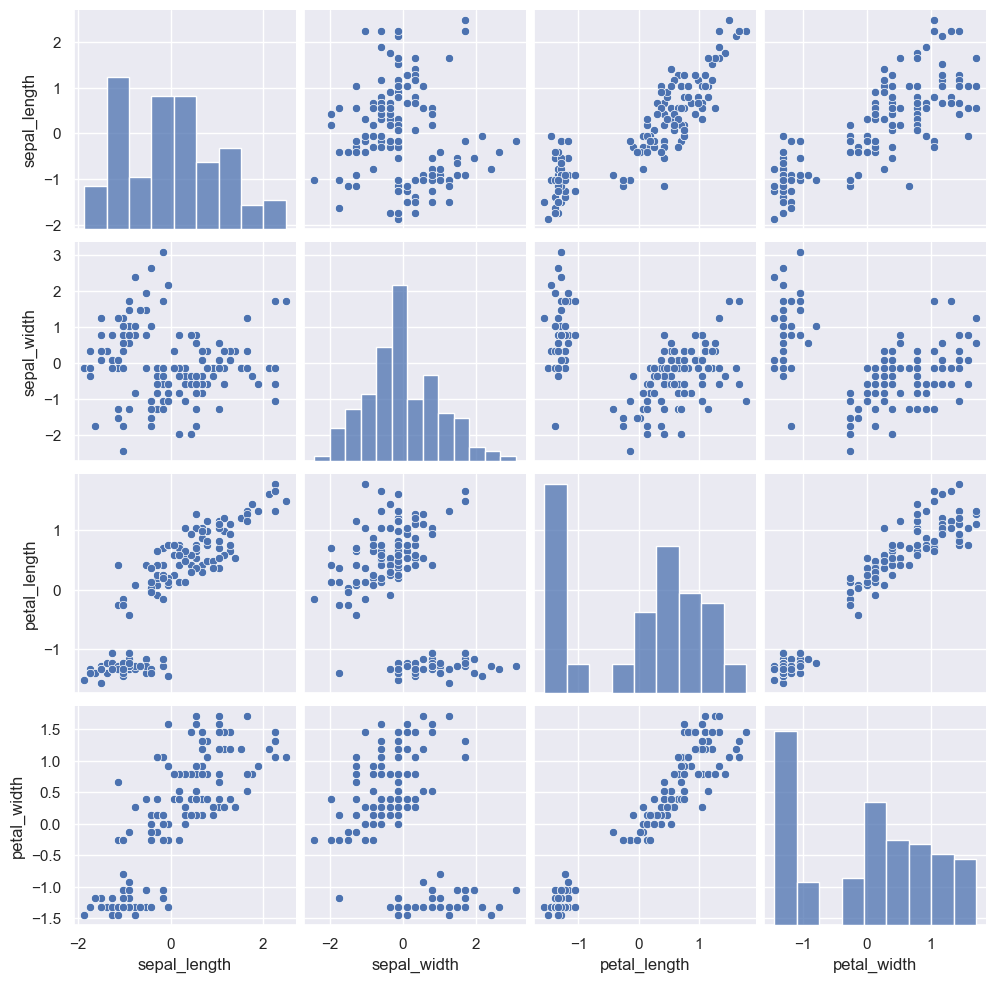

In [54]:
sns.pairplot(std_scaled_iris);

**Nota**: O método `fit` é usado para ajustar o normalizador, isto é, extrair dos dados a informação necessária para fazer a normalização (neste caso, a média e o desvio padrão de cada atributo), enquanto o método `transform` é usado para aplicar a normalização. O método `transform` pode ser aplicado sobre exemplos diferentes daqueles que foram usados para ajustar o normalizador. Isto permite normalizar novos dados da mesma forma que os do conjunto de dados original. O método `fit_transform` pode ser usado para efetuar as duas operações sequencialmente sobre o mesmo conjunto de dados, o que é conveniente em muitos casos.

Outra abordagem de normalização é escalar os valores dos atributos de forma a que estes fiquem dentro de um determinado intervalo, como por exemplo entre 0 e 1. Isso pode ser feito usando a funcionalidade da classe `MinMaxScaler`:

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
minmax_scaler = MinMaxScaler((0, 1))
minmax_scaled_iris = pd.DataFrame(minmax_scaler.fit_transform(iris_features), index=iris_features.index, columns=iris_features.columns)
minmax_scaled_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


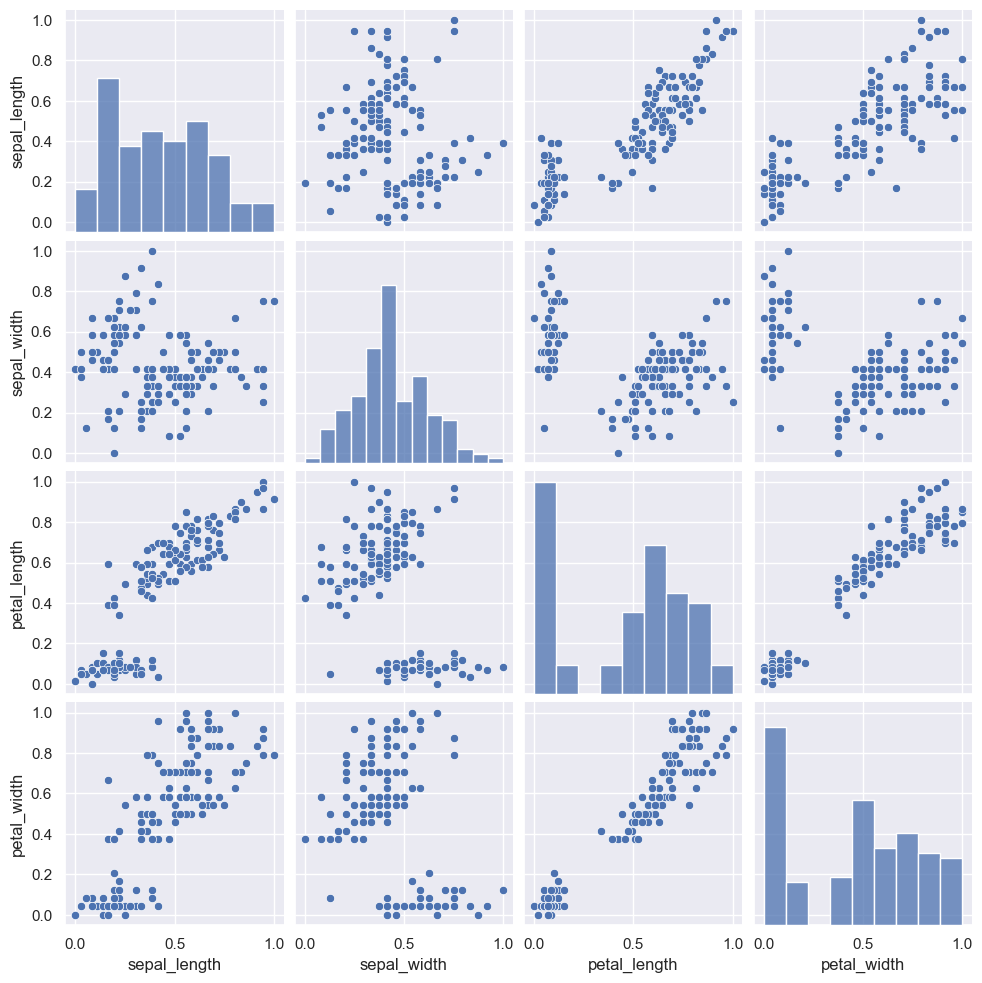

In [57]:
sns.pairplot(minmax_scaled_iris);

### Redução de dimensionalidade

Muitas vezes é necessário reduzir a dimensionalidade de um conjunto de dados para o conseguir analisar, visualizar, ou até mesmo para melhorar o desempenho de modelos de aprendizagem automática obtidos a partir desses dados. Existem várias abordagens para reduzir a dimensionalidade, sendo as mais comuns baseadas na seleção de um subconjunto representativo dos exemplos e/ou atributos originais de acordo com um determinado critério. Outra abordagem possível é fazer uma análise de componentes principais ([PCA](https://en.wikipedia.org/wiki/Principal_component_analysis)) e usar como atributos os componentes que refletem a maior variância no conjunto de dados. Para isso, pode ser usada a classe `PCA` da biblioteca *scikit-learn*:

In [58]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA(n_components=2)
pca.fit(iris_features)
pca_iris = pd.DataFrame(pca.transform(iris_features), index=iris_features.index, columns=['PC1', 'PC2'])
pca_iris.head()

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


**Nota**: Neste caso, escolhemos os dois componentes principais, o que nos ajuda a visualizar o conjunto de dados. Esta é uma abordagem comum, mesmo em casos em que os atributos originais são usados para fazer a restante análise do conjunto de dados.

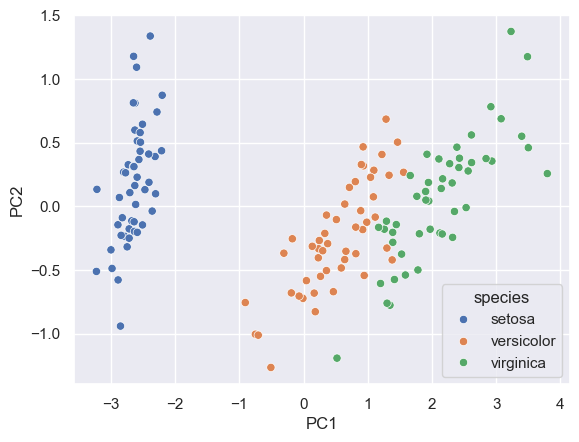

In [60]:
sns.scatterplot(pca_iris, x='PC1', y='PC2', hue=iris['species']);

Para verificar se os componentes selecionados são suficientemente representativos do conjunto de dados, podemos olhar para o rácio da variância total no conjunto de dados que estes explicam. Esta informação é dada pelo atributo `explained_variance_ratio_`:

In [61]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum() * 100)

[0.92461872 0.05306648]
97.7685206318795


Neste caso, podemos verificar que os dois componentes explicam perto de 98% da variância total no conjunto de dados.

## Agrupamento (*Clustering*)

O agrupamento, mais conhecido pelo termo inglês *clustering*, é uma técnica de aprendizagem não supervisionada que consiste em agrupar um conjunto de dados em grupos (clusters) em que os elementos de cada grupo são mais semelhantes entre si do que aos elementos de outros grupos. A biblioteca *scikit-learn* implementa vários algoritmos de *clustering*. Vamos explorar três: [k-Means](#k-Means), [agrupamento hierárquico aglomerativo](#Agrupamento-hierárquico-aglomerativo) e [DBSCAN](#DBSCAN).

### k-Means

O algoritmo [k-Means](https://en.wikipedia.org/wiki/K-means_clustering) agrupa os exemplos de um conjunto de dados de forma a que estes fiquem separados em *k* clusters de igual variância, minimizando o valor da soma dos quadrados das distâncias de cada exemplo ao centroide do seu cluster (*within-cluster sum-of-squares*). O algoritmo requer que o número de clusters, *k*, seja específicado. Esta abordagem de *clustering* escala bem para conjuntos de dados com muitos exemplos e é a mais usada no contexto da aprendizagem não supervisionada.

Na biblioteca *scikit-learn*, o algortimo *k-Means* é implementado pela classe `KMeans`, sendo o número de clusters definido pelo argumento `n_clusters`. Neste caso, vamos começar por usar um valor de *k=3* para comparação com a classificação das plantas por espécie:

In [62]:
from sklearn.cluster import KMeans

In [63]:
kmeans = KMeans(n_clusters=3, n_init='auto').fit(iris_features) # The n_init='auto' is only explicited to avoid a warning

**Nota**: A implementação do algoritmo k-Means na biblioteca *scikit-learn* inclui algumas otimizações. Por exemplo, a forma predefinida para escolha dos centroides iniciais segue o algoritmo [k-means++](https://en.wikipedia.org/wiki/K-means%2B%2B). Para além disso, esta implementação só permite o uso da distância euclidiana como função de distância.

Os centroides dos clusters obtidos e as atribuições dos exemplos aos clusters são dados pelos atributos `cluster_centers_` e `labels_`, respetivamente: 

In [64]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [65]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Vamos guardar este agrupamento na tabela de dados para podermos visualizá-lo e compará-lo com os obtidos usando os outros algoritmos: 

In [66]:
iris['kmeans'] = pd.Categorical(kmeans.labels_)

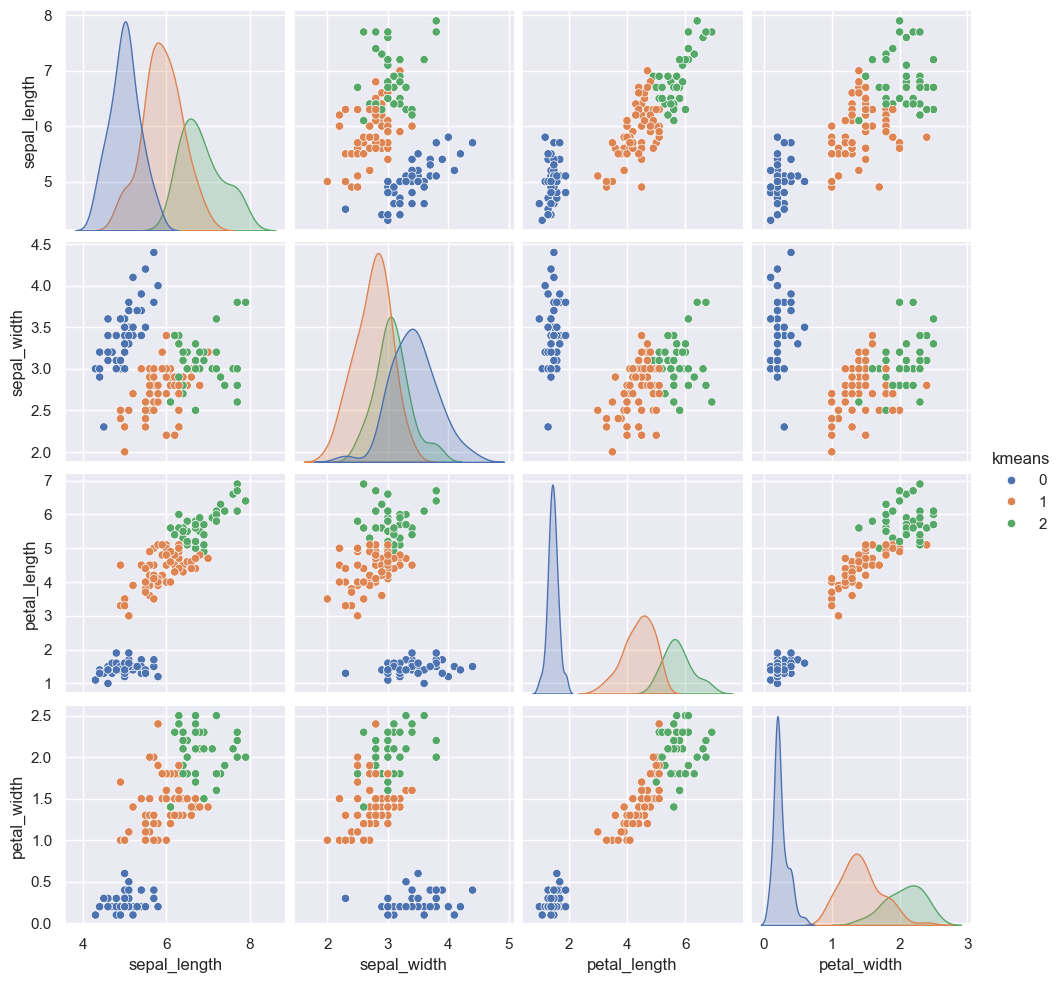

In [67]:
sns.pairplot(iris, hue='kmeans');

Também podemos visualizar o agrupamento usando a projeção dos dados nos dois componentes principais obtidos através da aplicação de [PCA](#Redução-de-dimensionalidade):

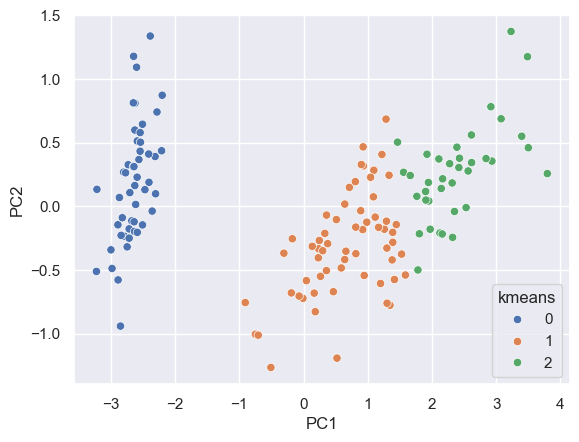

In [68]:
sns.scatterplot(pca_iris, x='PC1', y='PC2', hue=iris['kmeans']);

Podemos ver que o agrupamento obtido é distinto da classificação das plantas por espécie, mas tem algumas semelhanças:

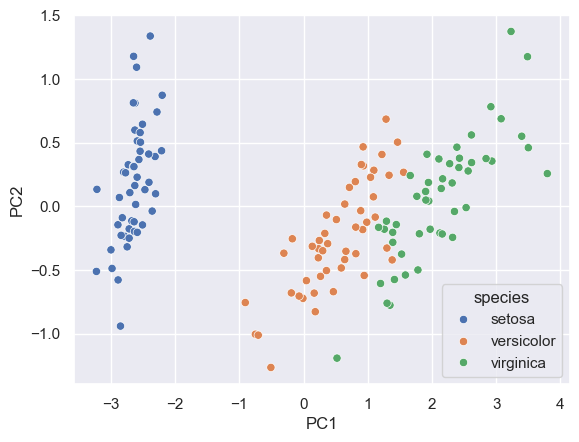

In [69]:
sns.scatterplot(pca_iris, x='PC1', y='PC2', hue=iris['species']);

O atributo `inertia_` guarda o valor da soma dos quadrados das distâncias de cada exemplo ao centroide do seu cluster (*within-cluster sum of squares*):

In [70]:
kmeans.inertia_

78.85144142614601

Podemos usar esta informação para analisar a qualidade do agrupamento para vários valores de *k*:

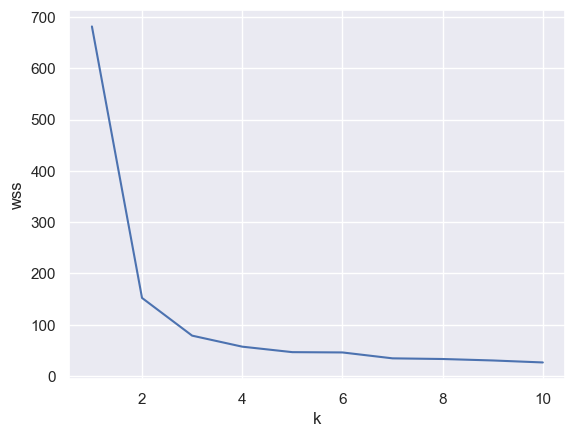

In [71]:
k_wss = pd.DataFrame([(k, KMeans(n_clusters=k, n_init='auto').fit(iris_features).inertia_) for k in range(1, 11)], columns=['k', 'wss'])
sns.lineplot(k_wss, x='k', y='wss');

Usando o método do "cotovelo" podemos concluir que *k=3* é um valor adequado para o número de clusters.

### Agrupamento hierárquico aglomerativo

O [clustering hierárquico](https://en.wikipedia.org/wiki/Hierarchical_clustering) é uma técnica de agrupamento que constrói clusters aninhados, unindo-os ou dividindo-os sucessivamente. A hierarquia de clusters pode ser representada como uma árvore (ou dendrograma). A raiz da árvore é o cluster único que reúne todos os exemplos e as folhas são os clusters com apenas um exemplo. O agrupamento hierárquico aglomerativo usa uma abordagem de baixo para cima, isto é, cada exemplo começa como um cluster e, a cada iteração do algoritmo, um par de clusters é unido. Na biblioteca *scikit-learn*, este algoritmo é implementado pela classe `AgglomerativeClustering`:

In [72]:
from sklearn.cluster import AgglomerativeClustering

In [73]:
hierarchical = AgglomerativeClustering(n_clusters=3).fit(iris_features)

**Nota**: Neste caso, o argumento `n_clusters` é usado para definir o número de clusters que se pretende obter no final, evitando a construção da árvore completa. Mais à frente vamos ver como construir e visualizar toda a árvore.

Tal como no caso do algoritmo *k-Means*, o atributo `labels_` guarda as atribuições dos exemplos aos clusters:

In [74]:
hierarchical.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

Mais uma vez, vamos guardar o agrupamento na tabela de dados para visualização e comparação com os restantes:

In [75]:
iris['hierarchical'] = pd.Categorical(hierarchical.labels_)

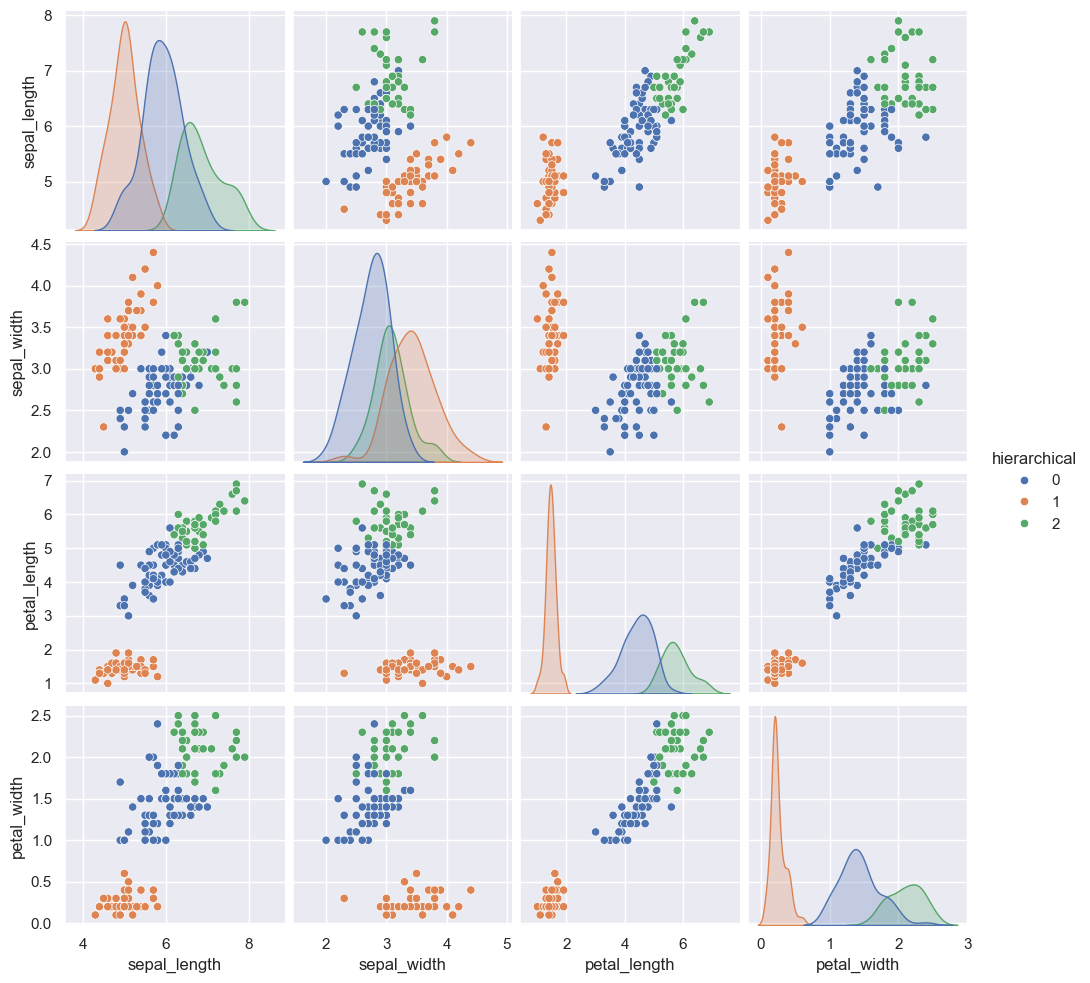

In [76]:
sns.pairplot(iris, hue='hierarchical');

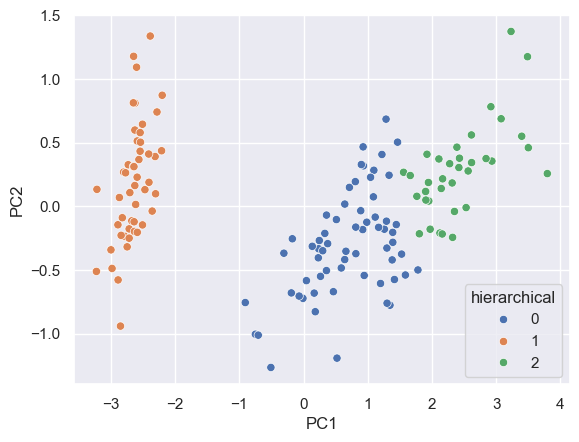

In [77]:
sns.scatterplot(pca_iris, x='PC1', y='PC2', hue=iris['hierarchical']);

Neste caso, o agrupamento obtido é muito semelhante ao obtido usando *k-means*, apenas com alguma variação na fronteira entre os dois *clusters* à direita. Esta diferença deve-se à sequência de otimizações locais efetuada pelo algoritmo de agrupamento hierárquico em contraste com a otimização global feita pelo algoritmo *k-means*:

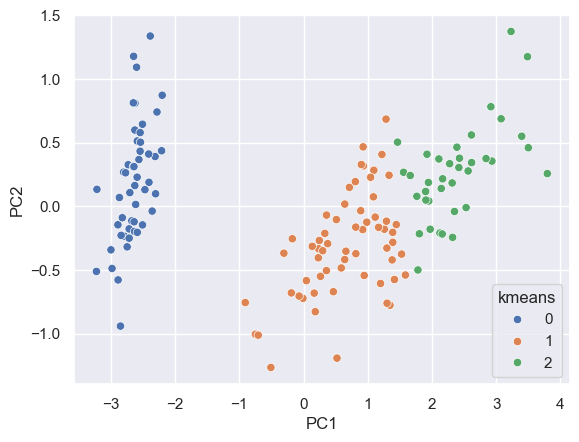

In [78]:
sns.scatterplot(pca_iris, x='PC1', y='PC2', hue=iris['kmeans']);

A forma como a distância entre dois *clusters* é calculada pode ser definida usando o argumento `linkage`. Por predefinição, é usado o [método de Ward](https://en.wikipedia.org/wiki/Ward%27s_method). Outras opções são `'average'`, `'single'` e `'complete'`. Por exemplo, usar a distância mínima entre pontos dos dois *clusters* (`'single'`) leva a resultados significativamente diferentes:

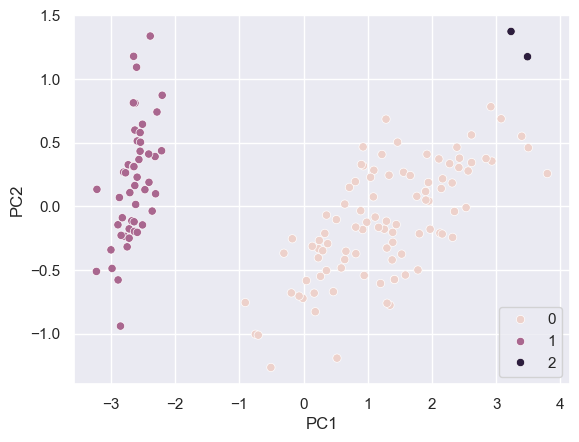

In [79]:
hierarchical_single_link = AgglomerativeClustering(n_clusters=3, linkage='single').fit(iris_features)
sns.scatterplot(pca_iris, x='PC1', y='PC2', hue=hierarchical_single_link.labels_);

Para obter a árvore completa, podemos aplicar o algoritmo com o argumento `n_clusters=None` e o argumento `distance_threshold=0`:

In [80]:
hierarchical_full = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(iris_features)

Para visualizar a árvore como um dendrograma podemos usar a seguinte função auxiliar definida na [documentação](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html) da biblioteca *scikit-learn*:

In [81]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

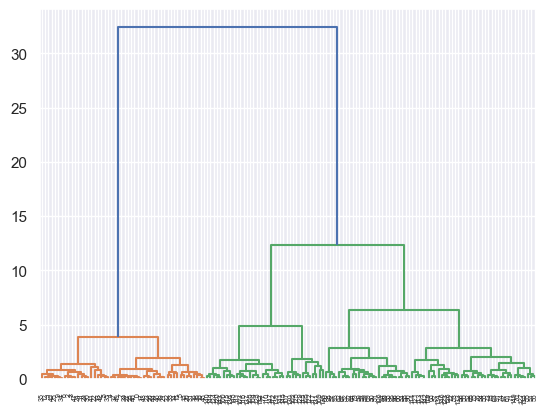

In [82]:
plot_dendrogram(hierarchical_full)

**Nota**: A visualização da árvore completa torna-se confusa para um número grande de exemplos. O argumento `truncate_mode` pode ser usado para cortar a árvore para incluir apenas um número limitado de clusters (`'lastp'`) ou ir apenas até um determinado nível de profundidade (`'level'`):

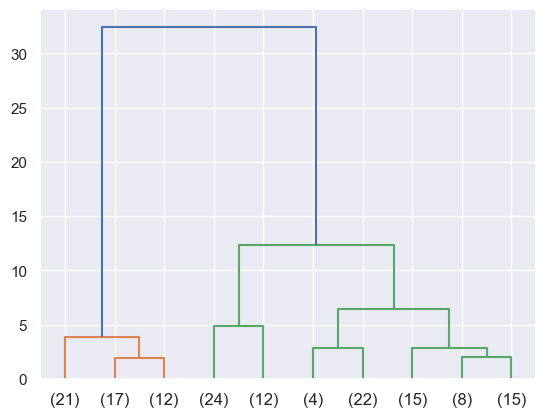

In [83]:
plot_dendrogram(hierarchical_full, truncate_mode='lastp', p=10)

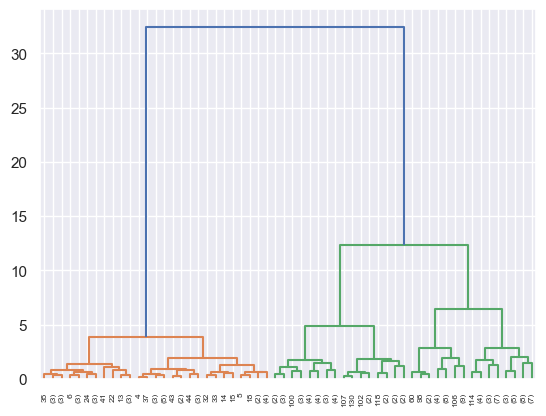

In [84]:
plot_dendrogram(hierarchical_full, truncate_mode='level', p=5)

### DBSCAN

O algoritmo [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN) encontra clusters de exemplos com base na densidade. Isto é, o algoritmo considera clusters como sendo áreas de alta densidade separadas por áreas de baixa densidade. Isto permite que que os clusters encontrados possam ter qualquer forma. Para além disso, não é necessário definir à priori o número de clusters a encontrar. Por outro lado, é necessário definir os parâmetros que controlam a densidade necessária para formar um cluster: o raio (`eps`) e o número de pontos dentro desse raio (`min_samples`). Na biblioteca *scikit-learn*, o algoritmo *DBSCAN* é implementado pela classe `DBSCAN`:

In [85]:
from sklearn.cluster import DBSCAN

In [86]:
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(iris_features)

Neste caso, a atribuição dos exemplos aos clusters dada pelo atributo `labels_` também pode incluir o valor `-1` que indica que o exemplo não faz parte de nenhum cluster:

In [87]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

Mais uma vez, vamos guardar e visualizar o agrupamento:

In [88]:
iris['dbscan'] = pd.Categorical(dbscan.labels_)

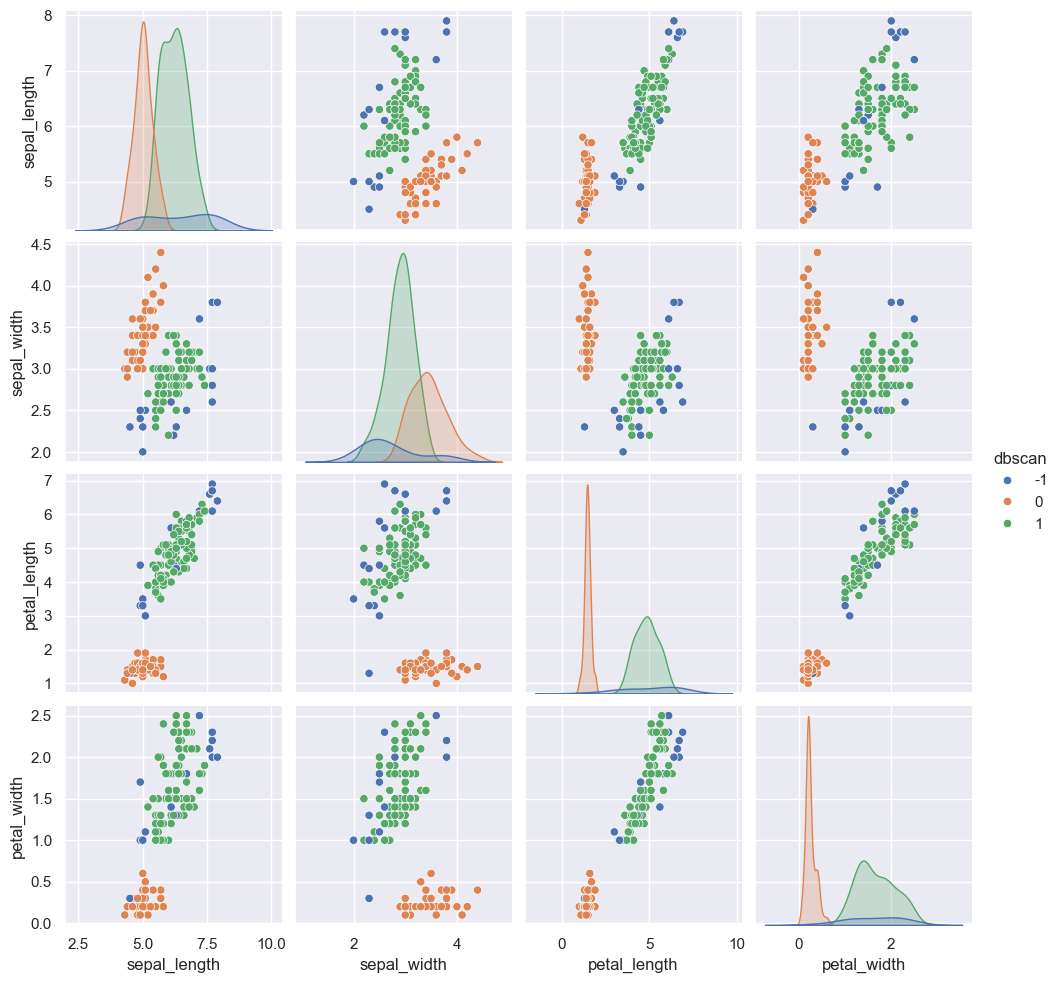

In [89]:
sns.pairplot(iris, hue='dbscan');

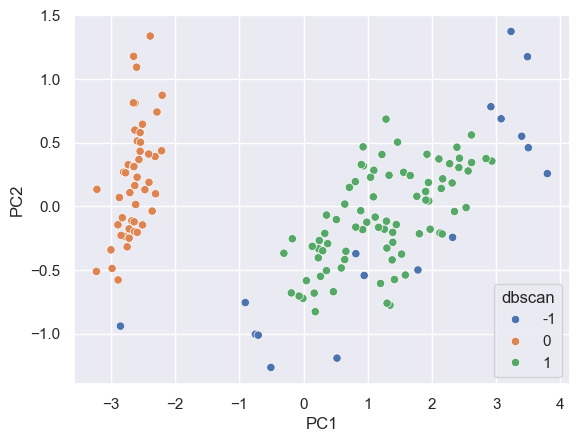

In [90]:
sns.scatterplot(pca_iris, x='PC1', y='PC2', hue=iris['dbscan']);

Neste caso, podemos ver que o agrupamento consiste em apenas dois clusters. Para além disso, existe um conjunto de pontos que não fazem parte de nenhum dos clusters e podem ser considerados anomalias.

Até agora tem sido usada a distância euclideana em todas as abordagens de agrupamento. No entanto, a implementação do algoritmo *DBSCAN* na biblioteca *scikit-learn* permite o uso de outras funções de distância através do argumento `metric`. Por exemplo, podemos usar a distância de Manhattan, o que leva a resultados bastante diferentes se os restantes parâmetros não forem alterados:

In [91]:
dbscan_manhattan = DBSCAN(eps=0.5, min_samples=5, metric='manhattan').fit(iris_features)

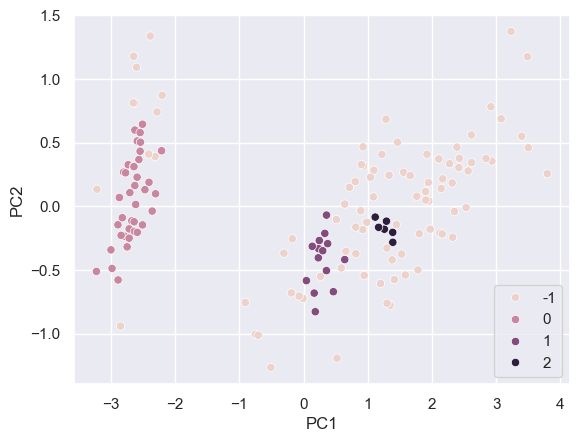

In [92]:
sns.scatterplot(pca_iris, x='PC1', y='PC2', hue=dbscan_manhattan.labels_);

**Nota**: A biblioteca *scikit-learn* disponibiliza múltiplas [funções de distância](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html). Cada uma dessas funções tem características diferentes. Como tal, os restantes parâmetros devem ser ajustados de forma adequada e a função de distância deve ser escolhida tendo em conta as características dos dados.

**Nota**: Também é possível variar a função de distância usada pelo algoritmo de agrupamento hierárquico aglomerativo, desde que não seja usado o método de Ward.

### Avaliação

A biblioteca *scikit-learn* disponibiliza um conjunto de métricas para avaliar a qualidade de agrupamentos sem depender de etiquetas externas, como por exemplo o [coeficiente de silhueta](#Coeficiente-de-silhueta), o [índice Calinski-Harabasz](#Índice-Calinski-Harabasz) e o [índice Davies-Bouldin](#Índice-Davies-Bouldin).

In [93]:
import sklearn.metrics

#### Coeficiente de silhueta

O [coeficiente de silhueta](https://en.wikipedia.org/wiki/Silhouette_(clustering)) é uma medida de quão similar um exemplo é ao aos outros exemplos do seu cluster (coesão) em comparação com os exemplos do cluster vizinho mais próximo (separação). O coeficiente de silhueta varia entre -1 e 1, sendo que um valor alto indica que o exemplo está bem enquadrado no seu próprio cluster. A média dos valores da silhueta para todos os pontos de um conjunto de dados é um bom indicador da qualidade de um agrupamento. Este valor pode ser calculado usando a função `silhouette_score`:

In [94]:
for c in ['kmeans', 'hierarchical', 'dbscan']:
    print(f'{c}: {sklearn.metrics.silhouette_score(iris_features, iris[c])}')

kmeans: 0.5528190123564101
hierarchical: 0.5543236611296425
dbscan: 0.4860341970345691


#### Índice Calinski-Harabasz

O [índice Calinski-Harabasz](https://en.wikipedia.org/wiki/Calinski-Harabasz_index), também conhecido como *Variance Ratio Criterion*, é o rácio entre a separação entre clusters (*between-cluster sum of squares*) e a dispersão dentro dos clusters (*within-cluster sum of squares*). Valores mais altos indicam um melhor agrupamento. Este índice pode ser calculado usando a função `calinski_harabasz_score`:

In [95]:
for c in ['kmeans', 'hierarchical', 'dbscan']:
    print(f'{c}: {sklearn.metrics.calinski_harabasz_score(iris_features, iris[c])}')

kmeans: 561.62775662962
hierarchical: 558.0580408128307
dbscan: 220.29751498443005


#### Índice Davies-Bouldin

O [índice Davies-Bouldin](https://en.wikipedia.org/wiki/Davies-Bouldin_index) indica a similaridade média entre clusters, em que a similaridade é uma medida que compara a distância entre clusters com o tamanho desses mesmos clusters. O valor minímo deste índice é zero, sendo que valores mais baixos indicam um melhor agrupamento. Este índice pode ser calculado usando a função `davies_bouldin_score`:

In [96]:
for c in ['kmeans', 'hierarchical', 'dbscan']:
    print(f'{c}: {sklearn.metrics.davies_bouldin_score(iris_features, iris[c])}')

kmeans: 0.6619715465007465
hierarchical: 0.6562564540642021
dbscan: 7.222448016359581


### Exemplos adicionais

Vamos explorar alguns exemplos adicionais para identificar situações em que as diferentes abordagens de *clustering* levam a resultados distintos. Para isso, vamos usar as funcionalidades de geração de conjuntos de dados da biblioteca *scikit-learn*:

In [97]:
import sklearn.datasets

Por exemplo, vamos criar um conjunto de dados com dois grupos distintos não circulares usando a função `make_moons`: 

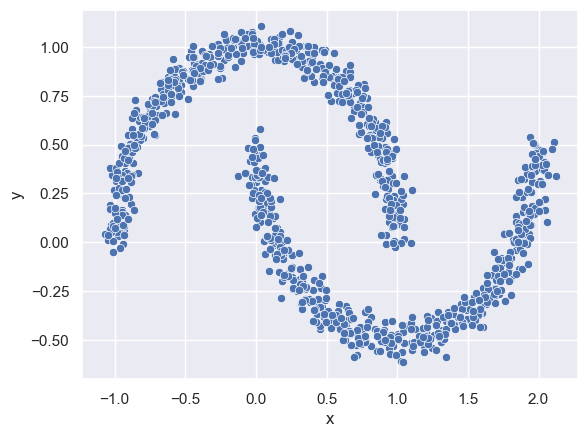

In [98]:
moons = pd.DataFrame(sklearn.datasets.make_moons(n_samples=1000, noise=0.05)[0], columns=['x', 'y'])
sns.scatterplot(moons, x='x', y='y');

Vamos aplicar as três abordagens de *clustering* que vimos anteriormente sobre este conjunto de dados:

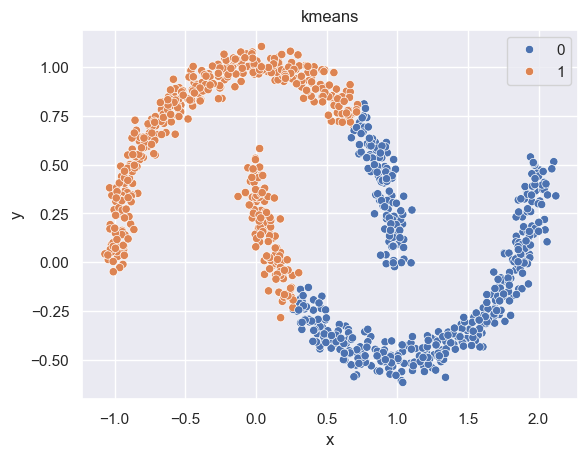

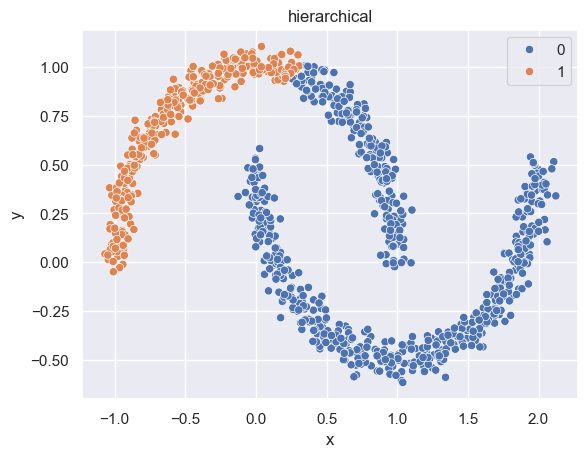

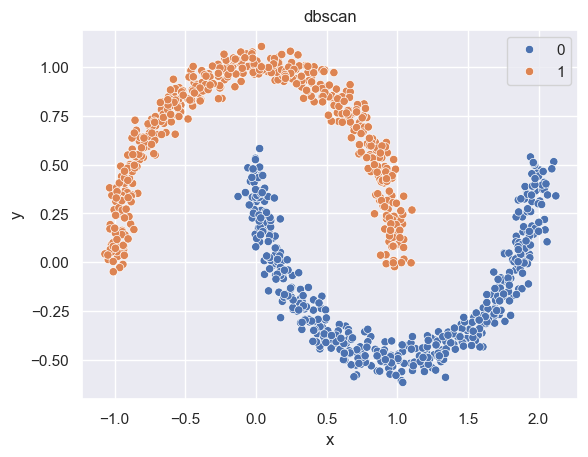

In [99]:
moons_clustering = {
    'kmeans': KMeans(n_clusters=2, n_init='auto').fit(moons).labels_,
    'hierarchical': AgglomerativeClustering(n_clusters=2).fit(moons).labels_,
    'dbscan': DBSCAN(eps=0.25, min_samples=5).fit(moons).labels_
}

for m, c in moons_clustering.items():
    sns.scatterplot(moons, x='x', y='y', hue=c).set(title=m)
    plt.show() # This is used to force every plot to be shown instead of just the last one

Neste caso, podemos observar resultados bastantes diferentes para as três abordagens. Apenas o agrupamento obtido usando DBSCAN corresponde ao esperado, uma vez que é baseado na densidade de exemplos num determinado espaço. Por outro lado, o algoritmo *k-means* e o agrupamento hierárquico usando o método de Ward levam a agrupamentos circulares distintos devido às diferentes estratégias de otimização.

**Nota**: É possível obter o agrupamento esperado usando a abordagem de agrupamento hierárquico se for usada a distância mínima entre pontos dos dois clusters em vez do método de Ward:

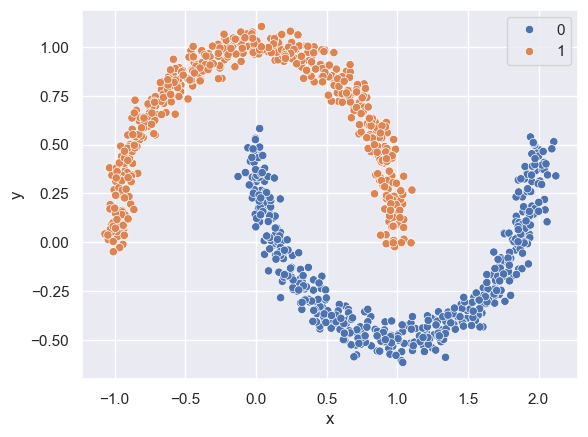

In [100]:
moons_single = AgglomerativeClustering(n_clusters=2, linkage='single').fit(moons)
sns.scatterplot(moons, x='x', y='y', hue=moons_single.labels_);

Agora vamos usar a função `make_blobs` para criar um conjunto de dados com três grupos circulares, dois deles muito próximos:

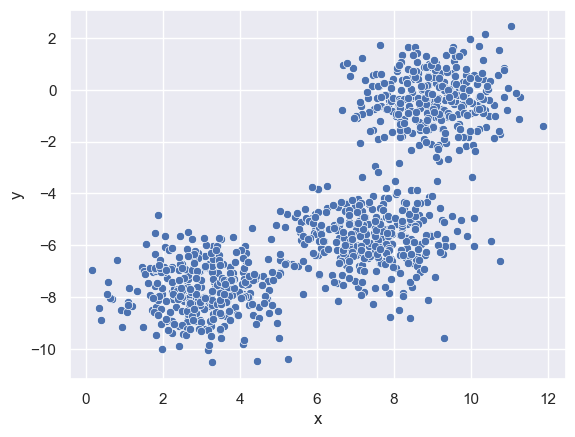

In [101]:
blobs = pd.DataFrame(sklearn.datasets.make_blobs(n_samples=1000, centers=3, random_state=1000)[0], columns=['x', 'y'])
sns.scatterplot(blobs, x='x', y='y');

**Nota**: O argumento `random_state` é usado para que o resultado seja reprodutível. Este pode ser usado na maioria das funções definidas pela biblioteca *scikit-learn* que envolvem algum tipo de aleatoriedade.

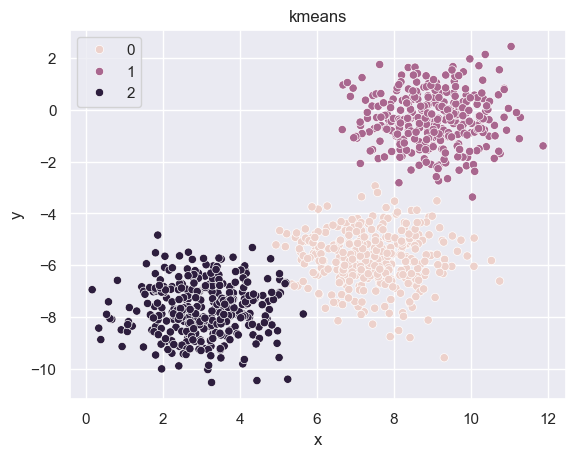

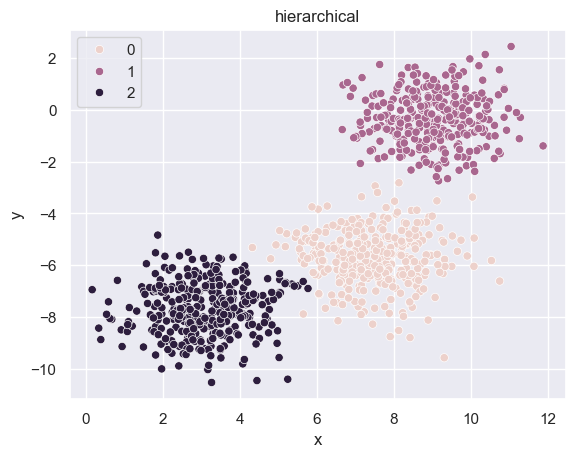

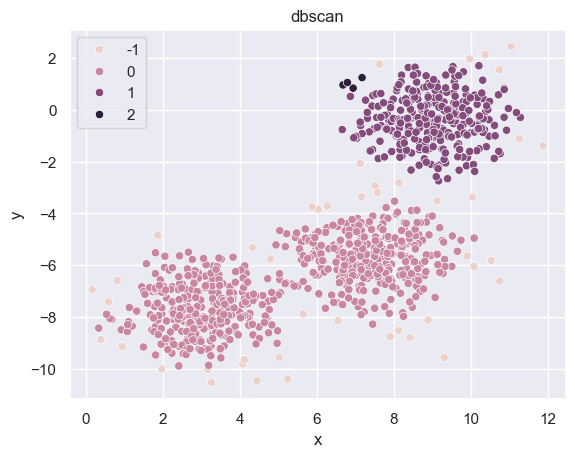

In [102]:
blobs_clustering = {
    'kmeans': KMeans(n_clusters=3, n_init='auto').fit(blobs).labels_,
    'hierarchical': AgglomerativeClustering(n_clusters=3).fit(blobs).labels_,
    'dbscan': DBSCAN(eps=0.5, min_samples=5).fit(blobs).labels_
}

for m, c in blobs_clustering.items():
    sns.scatterplot(blobs, x='x', y='y', hue=c).set(title=m)
    plt.show() # This is used to force every plot to be shown instead of just the last one

Neste caso, podemos ver que, tal como no conjunto de dados *Iris*, os agrupamentos gerados pelo algoritmo *k-Means* e pelo agrupamento hierárquico aglomerativo são muito semelhantes, havendo apenas pequenas variações nas fronteiras entre clusters. Por outro lado, o agrupamento gerado pelo algoritmo *DBSCAN* é bastante diferente, juntando os exemplos dos dois *blobs* mais próximos e separando um pequeno grupo de exemplos dos restantes.

**Nota**: Não esquecer que variações dos parâmetros de controlo levam a resultados diferentes. Por isso, devem ser exploradas múltiplas configurações.